# Decision Trees and Random Forests
Demonstrate Decision Trees and Random Forests for binary classification by generating and visualizing a synthetic 2D dataset

## Generate and Visualize Sample Data


Create a simple, separable 2D synthetic dataset suitable for binary classification. Visualize the data using a scatter plot to clearly show the different classes, which will serve as the input for our classification models.


**Reasoning**:
The subtask requires generating a synthetic dataset and visualizing it. This involves importing necessary libraries, generating the data using `make_classification`, and then plotting it using `matplotlib.pyplot` with appropriate labels and a title to visualize the two classes.



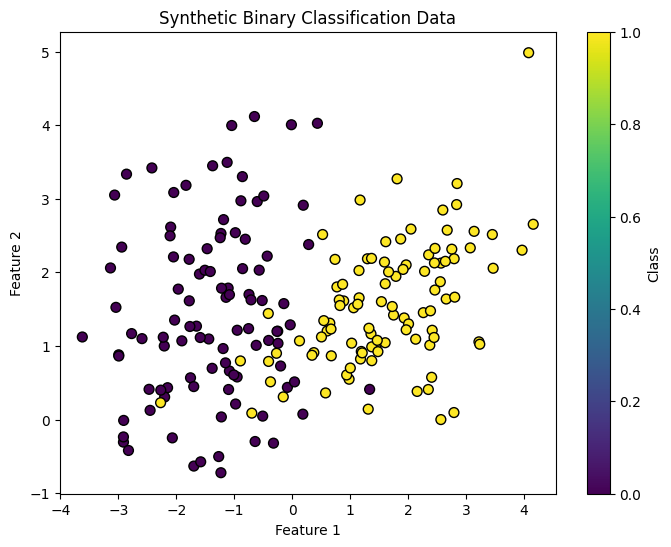

Synthetic binary classification data generated and visualized.


In [160]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42, class_sep=1.5)

# Plot the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Data')
plt.colorbar(label='Class')
plt.show()
print("Synthetic binary classification data generated and visualized.")

## Decision Tree Classifier and Visualization


Train a basic Decision Tree Classifier on the generated synthetic data. After training, visualize the decision boundary of the tree on the plot, illustrating how a single tree partitions the feature space to make classifications.
https://www.youtube.com/watch?v=_L39rN6gz7Y&t=18s


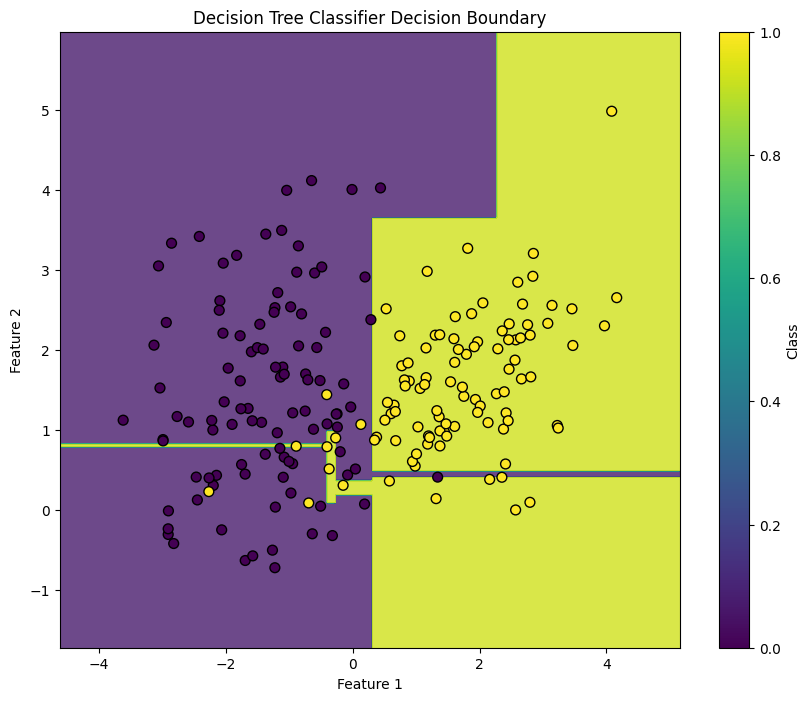

Decision Tree Classifier trained and its decision boundary visualized.


In [161]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 1. Create an instance of DecisionTreeClassifier with random_state=42
dtree_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)

# 2. Train the Decision Tree classifier
dtree_classifier.fit(X, y)

# 3. Create a meshgrid to cover the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 4. Predict the class labels for each point in the meshgrid
Z = dtree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the meshgrid dimensions
Z = Z.reshape(xx.shape)

# 5. Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# 6. Overlay the original scatter plot of X and y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# 7. Add appropriate labels for the x and y axes, and a title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Classifier Decision Boundary')
plt.colorbar(label='Class')

# 8. Display the plot
plt.show()
print("Decision Tree Classifier trained and its decision boundary visualized.")

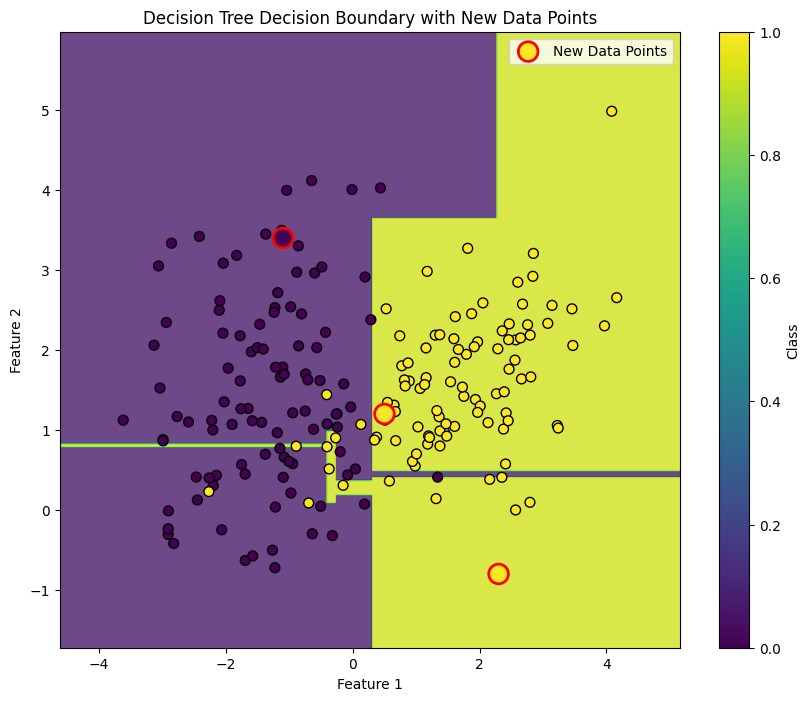

New Data Points:
[[ 0.5  1.2]
 [ 2.3 -0.8]
 [-1.1  3.4]]
Predicted Classes: [1 1 0]


In [162]:
# --- New Data Points to Predict ---
new_data = np.array([
    [0.5, 1.2],
    [2.3, -0.8],
    [-1.1, 3.4]
])

# Predict their classes
new_predictions = dtree_classifier.predict(new_data)

# --- Plot them on the same decision boundary ---
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# New points: plotted with larger size and white edge
plt.scatter(new_data[:, 0], new_data[:, 1],
            c=new_predictions,
            cmap='viridis',
            s=200,
            edgecolors='red',
            marker='o',
            linewidths=2,
            label='New Data Points')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundary with New Data Points')
plt.colorbar(label='Class')
plt.legend()
plt.show()

print("New Data Points:")
print(new_data)
print("Predicted Classes:", new_predictions)


## Random Forest Classifier and Visualization


Train a Random Forest Classifier on the same synthetic dataset. Visualize its decision boundary, comparing it to the Decision Tree's boundary to demonstrate the ensemble effect leading to potentially smoother and more robust classifications.


**Reasoning**:
To fulfill the subtask, I need to train a Random Forest Classifier and visualize its decision boundary. This involves importing the classifier, training it on the existing data, predicting on the meshgrid, and then plotting the results, similar to how the Decision Tree was visualized.



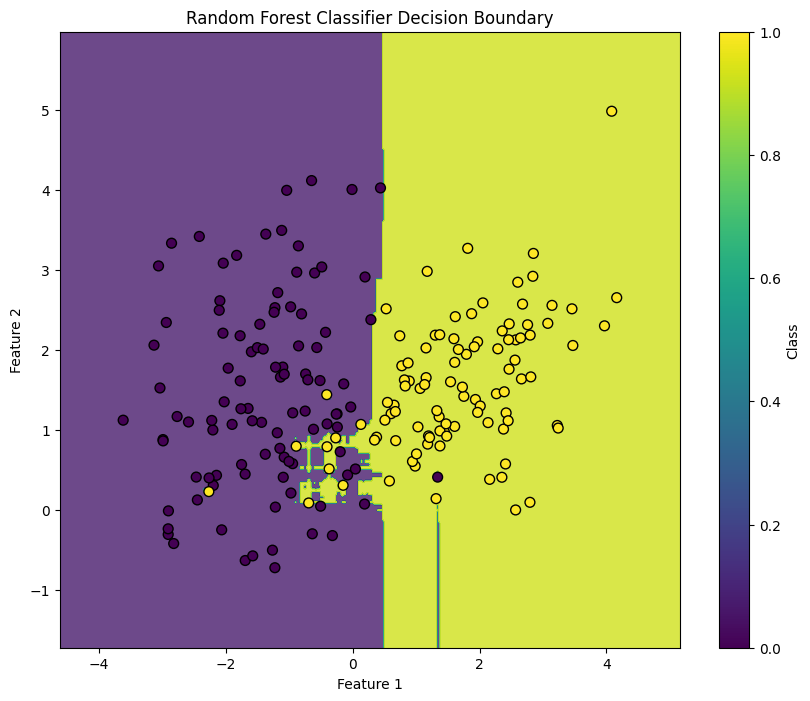

In [163]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the Random Forest classifier
rf_classifier.fit(X, y)

# 3. Predict the class labels for each point in the meshgrid
Z_rf = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the meshgrid dimensions
Z_rf = Z_rf.reshape(xx.shape)

# 4. Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_rf, alpha=0.8, cmap='viridis')

# 5. Overlay the original scatter plot of X and y
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

# 6. Add appropriate labels for the x and y axes, and a title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classifier Decision Boundary')
plt.colorbar(label='Class')

# 7. Display the plot
plt.show()


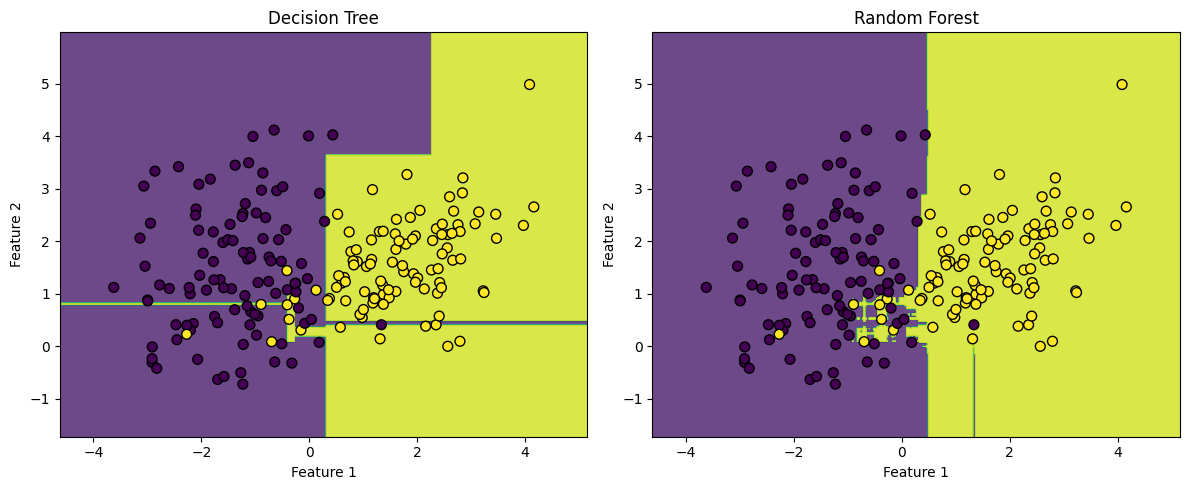

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Fit both models
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X, y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict on mesh
grid = np.c_[xx.ravel(), yy.ravel()]
Z_dt = dt.predict(grid).reshape(xx.shape)
Z_rf = rf.predict(grid).reshape(xx.shape)

# Plot side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_dt, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Decision Tree')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rf, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Random Forest')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Feature Importance with Random Forest


Demonstrate how to extract and visualize feature importances from the trained Random Forest model. This step will highlight which features are most influential in the model's predictions, using a bar chart for clear representation.


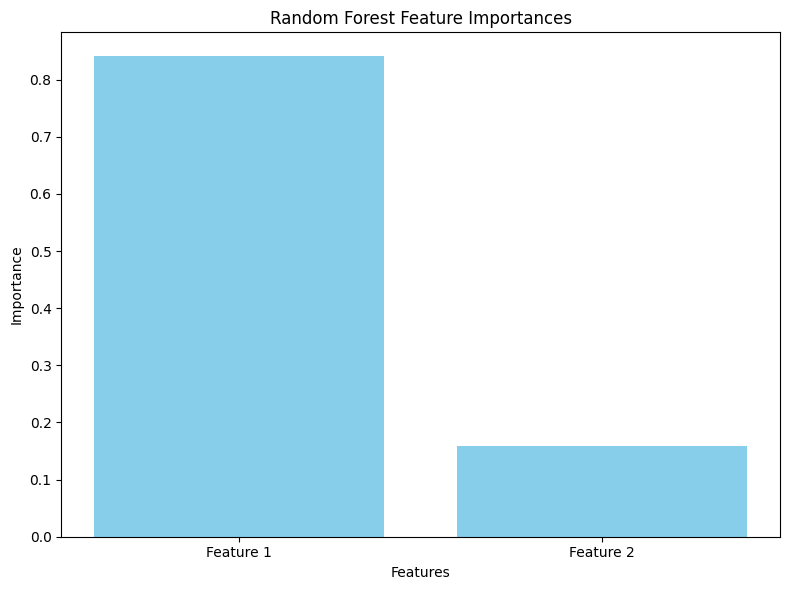

Random Forest feature importances extracted and visualized.


In [165]:
import matplotlib.pyplot as plt

# 1. Access feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Create a list of feature names for a 2D dataset
feature_names = ['Feature 1', 'Feature 2']

# Sort feature importances in descending order for better visualization
sorted_idx = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# 2. Create a bar chart to visualize feature importances
plt.figure(figsize=(8, 6))
plt.bar(sorted_feature_names, sorted_feature_importances, color='skyblue')

# 3. Add a title to the bar chart
plt.title('Random Forest Feature Importances')

# 4. Label the x-axis as 'Features' and the y-axis as 'Importance'
plt.xlabel('Features')
plt.ylabel('Importance')

# 5. Display the plot
plt.tight_layout()
plt.show()
print("Random Forest feature importances extracted and visualized.")

## Model Evaluation and Prediction


Evaluate the performance of both the Decision Tree and Random Forest classifiers using a simple metric like accuracy. Also, show how to use the trained models to make predictions on new, unseen data, concluding the practical application of these models.


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Modules for model evaluation and splitting data imported.")

Modules for model evaluation and splitting data imported.


Decision Tree Accuracy: 0.970
Random Forest Accuracy: 0.985

New Data Points:
[[1.2 1.1]
 [2.  1.8]
 [0.9 1.6]
 [3.2 2.6]
 [1.5 2.8]]
Decision Tree Predictions: [0 1 1 1 1]
Random Forest Predictions: [0 1 1 1 1]


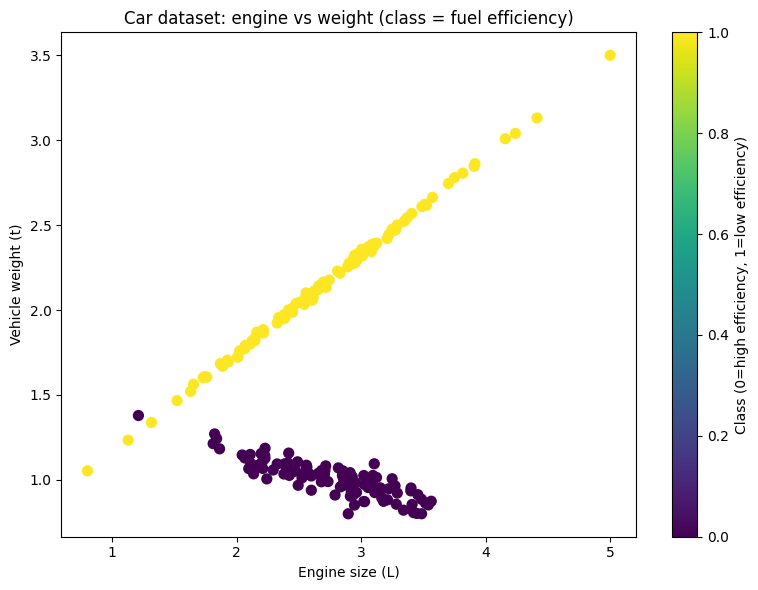

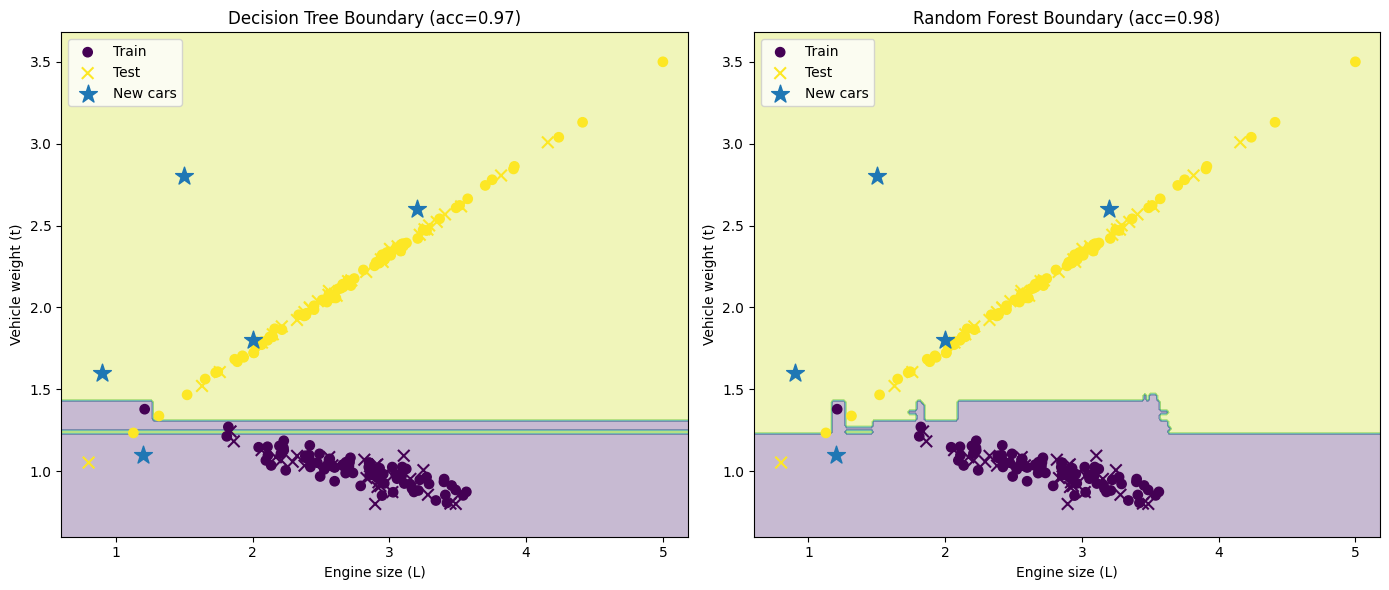

In [167]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------
# 1) Practical synthetic "car" dataset
#    Feature 1: Engine size (liters)
#    Feature 2: Vehicle weight (tons)
#    Target: 1 = likely low efficiency (higher fuel use), 0 = likely high efficiency
# -----------------------------
X_raw, y = make_classification(
    n_samples=220,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.6,
    random_state=42
)

# Map raw features to car-like ranges:
# Engine size: ~ 0.8L to 5.0L
# Weight: ~ 0.8t to 3.5t
engine = (X_raw[:, 0] - X_raw[:, 0].min()) / (np.ptp(X_raw[:, 0]) + 1e-9) * (5.0 - 0.8) + 0.8
weight = (X_raw[:, 1] - X_raw[:, 1].min()) / (np.ptp(X_raw[:, 1]) + 1e-9) * (3.5 - 0.8) + 0.8
X = np.column_stack([engine, weight])

# -----------------------------
# 2) Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# -----------------------------
# 3) Train models
# -----------------------------
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# -----------------------------
# 4) Evaluate and print accuracies
# -----------------------------
y_pred_dtree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {accuracy_dtree:.3f}")
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")

# -----------------------------
# 5) New practical car samples to classify
#    [engine (L), weight (t)]
# -----------------------------
new_cars = np.array([
    [1.2, 1.1],  # small engine, light car
    [2.0, 1.8],  # moderate engine, moderate weight
    [0.9, 1.6],  # very small engine, moderate weight
    [3.2, 2.6],  # large engine, heavy car
    [1.5, 2.8]   # small engine, heavy car
])

pred_new_dtree = dtree.predict(new_cars)
pred_new_rf = rf.predict(new_cars)

print("\nNew Data Points:")
print(new_cars.astype(float))
print(f"Decision Tree Predictions: {pred_new_dtree}")
print(f"Random Forest Predictions: {pred_new_rf}")

# -----------------------------
# 6) Original scatter plot (the first chart)
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel("Engine size (L)")
plt.ylabel("Vehicle weight (t)")
plt.title("Car dataset: engine vs weight (class = fuel efficiency)")
plt.colorbar(label="Class (0=high efficiency, 1=low efficiency)")
plt.tight_layout()
plt.show()

# -----------------------------
# 7) Decision boundaries (side by side)
# -----------------------------
# Meshgrid over feature space
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z_dtree = dtree.predict(grid).reshape(xx.shape)
Z_rf = rf.predict(grid).reshape(xx.shape)

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Decision Tree boundary
ax = axes[0]
ax.contourf(xx, yy, Z_dtree, alpha=0.30)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=45, marker='o', cmap='viridis', label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=70, marker='x', cmap='viridis', label='Test')  # no edgecolor -> no warning
ax.scatter(new_cars[:, 0], new_cars[:, 1], marker='*', s=180, label='New cars')
ax.set_title(f"Decision Tree Boundary (acc={accuracy_dtree:.2f})")
ax.set_xlabel("Engine size (L)")
ax.set_ylabel("Vehicle weight (t)")
ax.legend(loc='best')

# Random Forest boundary
ax = axes[1]
ax.contourf(xx, yy, Z_rf, alpha=0.30)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=45, marker='o', cmap='viridis', label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=70, marker='x', cmap='viridis', label='Test')
ax.scatter(new_cars[:, 0], new_cars[:, 1], marker='*', s=180, label='New cars')
ax.set_title(f"Random Forest Boundary (acc={accuracy_rf:.2f})")
ax.set_xlabel("Engine size (L)")
ax.set_ylabel("Vehicle weight (t)")
ax.legend(loc='best')

plt.tight_layout()
plt.show()


Decision Tree Accuracy: 0.900
Random Forest Accuracy: 0.950

New Data Points:
 [[-0.2  0. ]
 [ 2.   2. ]
 [-1.  -1. ]
 [ 3.   4. ]
 [-2.   0. ]]
Decision Tree Predictions: [1 1 0 1 0]
Random Forest Predictions: [0 1 0 1 0]


/tmp/ipython-input-2931976922.py:75: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=70, marker='x', edgecolor='k', label='Test')
/tmp/ipython-input-2931976922.py:87: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=70, marker='x', edgecolor='k', label='Test')


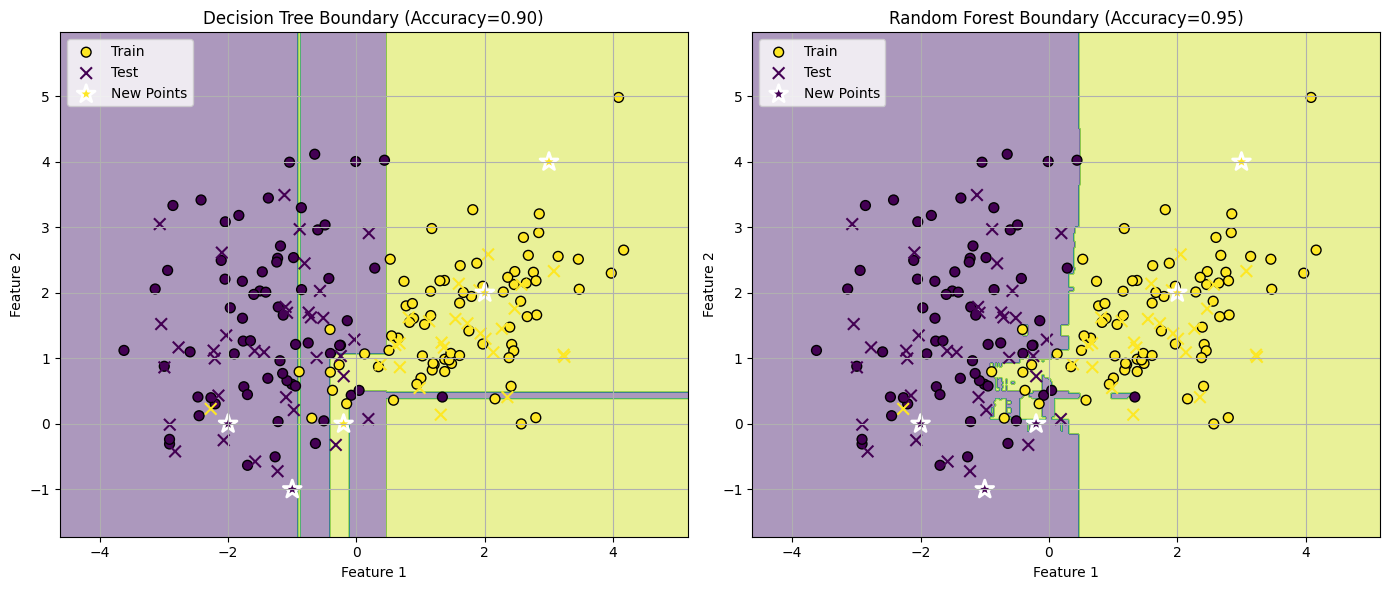

Visualization Completed.


In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------
# 1. Generate Synthetic Data
# -----------------------------
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
    class_sep=1.5
)

# -----------------------------
# 2. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# 3. Train Models
# -----------------------------
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

# -----------------------------
# 4. Evaluate Models
# -----------------------------
acc_dtree = accuracy_score(y_test, dtree.predict(X_test))
acc_rf = accuracy_score(y_test, rf.predict(X_test))

print(f"Decision Tree Accuracy: {acc_dtree:.3f}")
print(f"Random Forest Accuracy: {acc_rf:.3f}")

# -----------------------------
# 5. New unseen data points
# -----------------------------
new_data = np.array([[-.20, 0], [2, 2], [-1, -1], [3, 4], [-2, 0]])
pred_dtree = dtree.predict(new_data)
pred_rf = rf.predict(new_data)

print("\nNew Data Points:\n", new_data)
print("Decision Tree Predictions:", pred_dtree)
print("Random Forest Predictions:", pred_rf)

# -----------------------------
# 6. Visualization (Side-by-Side)
# -----------------------------
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_dtree = dtree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(14, 6))

# ---- Decision Tree Plot ----
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_dtree, alpha=0.45, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=70, marker='x', edgecolor='k', label='Test')
plt.scatter(new_data[:, 0], new_data[:, 1], c=pred_dtree, cmap='viridis', s=180, marker='*', edgecolor='white', linewidths=2, label='New Points')
plt.title(f"Decision Tree Boundary (Accuracy={acc_dtree:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()

# ---- Random Forest Plot ----
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rf, alpha=0.45, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', s=70, marker='x', edgecolor='k', label='Test')
plt.scatter(new_data[:, 0], new_data[:, 1], c=pred_rf, cmap='viridis', s=180, marker='*', edgecolor='white', linewidths=2, label='New Points')
plt.title(f"Random Forest Boundary (Accuracy={acc_rf:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()
print("Visualization Completed.")


#K-Means


##Manual K-Means — Update Centroids

Now, we'll update the centroids by calculating the mean of all points assigned to each cluster. This completes one iteration of the K-Means algorithm.

New Centroid C1: [0.9 1.6]
New Centroid C2: [3.5 3.5]


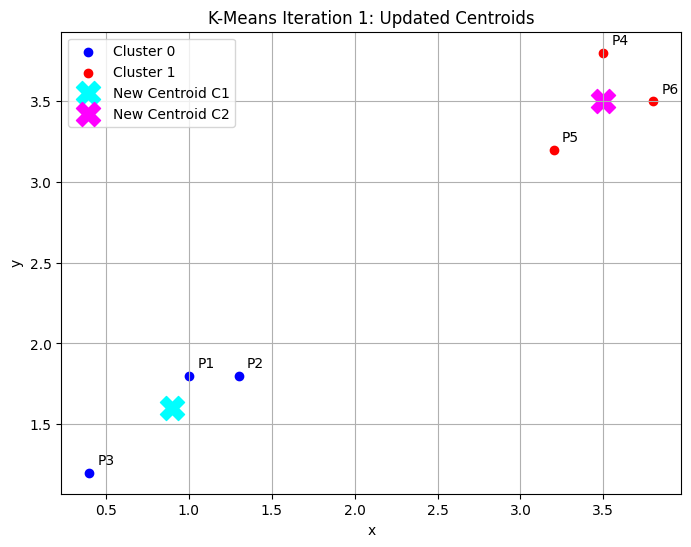

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# 1) Define Six Points (P1–P6)
# -----------------------------------------
# Let's invent 6 data points manually for simplicity
X = np.array([
    [1.0, 1.8],  # P1
    [1.3, 1.8],  # P2
    [0.4, 1.2],  # P3
    [3.5, 3.8],  # P4
    [3.2, 3.2],  # P5
    [3.8, 3.5]   # P6
])

labels = np.array(["P1", "P2", "P3", "P4", "P5", "P6"])

# -----------------------------------------
# 2) Assume cluster assignments (Iteration 1 result)
# -----------------------------------------
# First three points -> Cluster 0
# Last three points -> Cluster 1
clusters = np.array([0, 0, 0, 1, 1, 1])

# -----------------------------------------
# 3) Compute New Centroids
# -----------------------------------------
new_centroid_1 = X[clusters == 0].mean(axis=0)
new_centroid_2 = X[clusters == 1].mean(axis=0)

print(f"New Centroid C1: {new_centroid_1}")
print(f"New Centroid C2: {new_centroid_2}")

# -----------------------------------------
# 4) Visualization
# -----------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], color='blue', label='Cluster 0')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], color='red', label='Cluster 1')

# Plot new centroids
plt.scatter(new_centroid_1[0], new_centroid_1[1], color='cyan', marker='X', s=300, label='New Centroid C1')
plt.scatter(new_centroid_2[0], new_centroid_2[1], color='magenta', marker='X', s=300, label='New Centroid C2')

# Label each original point with P1–P6
for i, txt in enumerate(labels):
    plt.annotate(txt, (X[i,0]+0.05, X[i,1]+0.05))

plt.title('K-Means Iteration 1: Updated Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


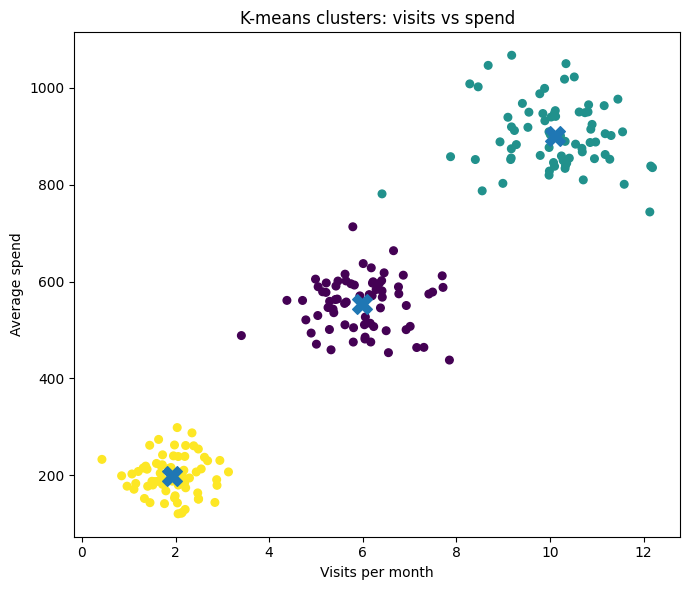

Cluster 0: visits≈6.0, spend≈554
Cluster 1: visits≈10.1, spend≈901
Cluster 2: visits≈1.9, spend≈198


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Synthetic "retail" data: [visits_per_month, avg_spend]
rng = np.random.RandomState(42)
cluster1 = rng.normal([2, 200], [0.6, 40], size=(70, 2))   # low visits, low spend
cluster2 = rng.normal([6, 550], [0.8, 60], size=(70, 2))   # mid visits, mid spend
cluster3 = rng.normal([10, 900], [1.0, 80], size=(70, 2))  # high visits, high spend
#cluster4 = rng.normal([2, 900], [1., 100], size=(70, 2))  # low visits, high spend
X = np.vstack([cluster1, cluster2, cluster3])

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plot clusters and centroids
plt.figure(figsize=(7, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200)
plt.xlabel("Visits per month")
plt.ylabel("Average spend")
plt.title("K-means clusters: visits vs spend")
plt.tight_layout()
plt.show()

# Simple business readout
for i, c in enumerate(centroids):
    print(f"Cluster {i}: visits≈{c[0]:.1f}, spend≈{c[1]:.0f}")


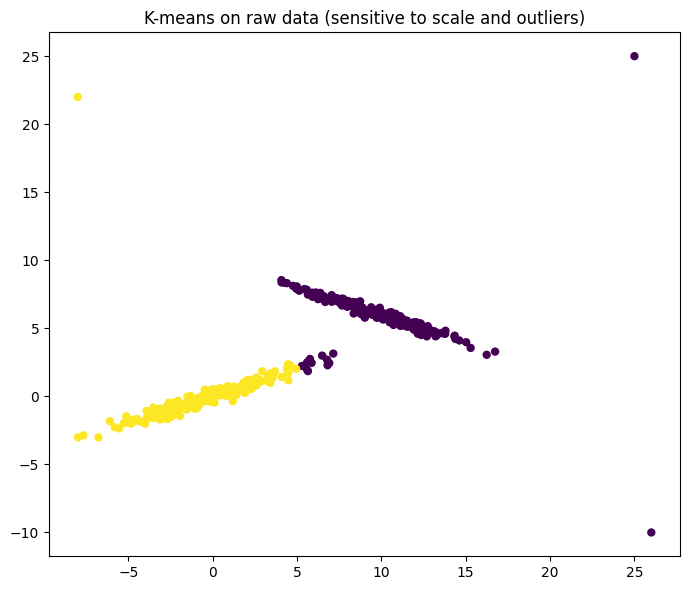

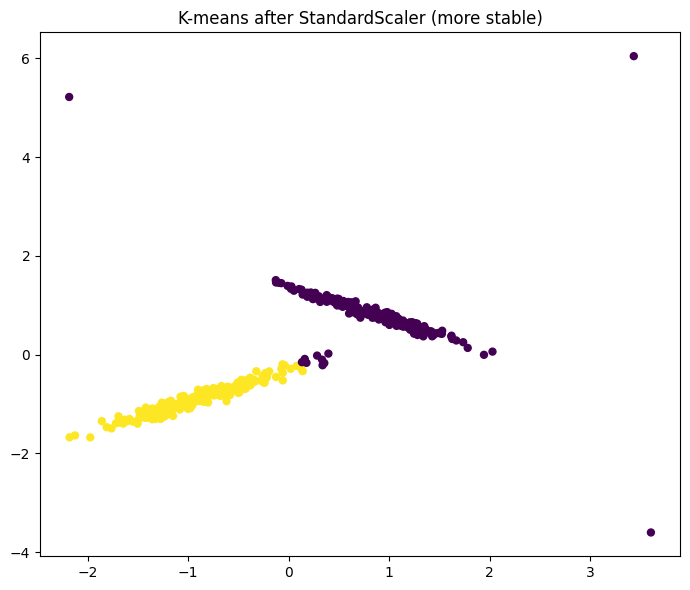

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

rng = np.random.RandomState(0)

# Non-spherical data: two elongated clusters
a = np.dot(rng.randn(200, 2), np.array([[3, 1.2],[0, 0.3]])) + np.array([0, 0])
b = np.dot(rng.randn(200, 2), np.array([[2.5, -1],[0, 0.2]])) + np.array([10, 6])
X = np.vstack([a, b])

# Add a few strong outliers
outliers = np.array([[25, 25], [26, -10], [-8, 22]])
X_with_outliers = np.vstack([X, outliers])

# K-means without scaling
km_raw = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X_with_outliers)
labels_raw = km_raw.labels_

# K-means with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_outliers)
km_scaled = KMeans(n_clusters=2, n_init=10, random_state=0).fit(X_scaled)
labels_scaled = km_scaled.labels_

# Plot raw
plt.figure(figsize=(7, 6))
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=labels_raw, s=25)
plt.title("K-means on raw data (sensitive to scale and outliers)")
plt.tight_layout()
plt.show()

# Plot scaled
plt.figure(figsize=(7, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled, s=25)
plt.title("K-means after StandardScaler (more stable)")
plt.tight_layout()
plt.show()



Limitations of K-means + Importance of Preprocessing
K-means assumes clusters are round / spherical, so it struggles with elongated or irregular shapes.

It is also sensitive to scale, features with large numeric ranges dominate distance.

Outliers can pull centroids drastically, leading to bad clustering.

Standardization (e.g., StandardScaler) helps make all features contribute equally.
Always preprocess data before K-means to improve stability and meaningful grouping.

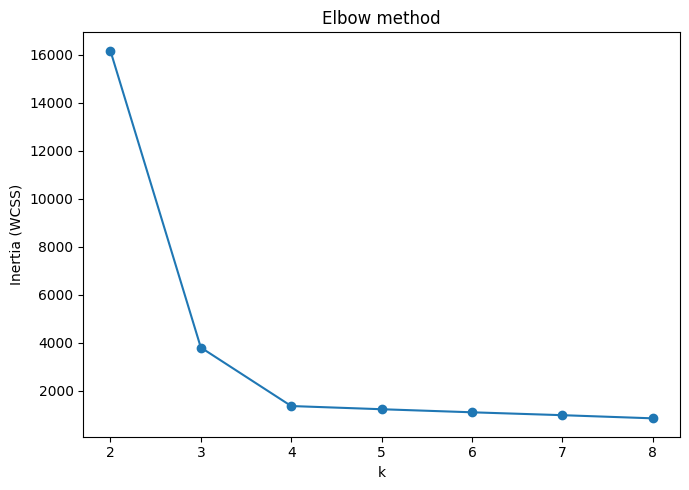

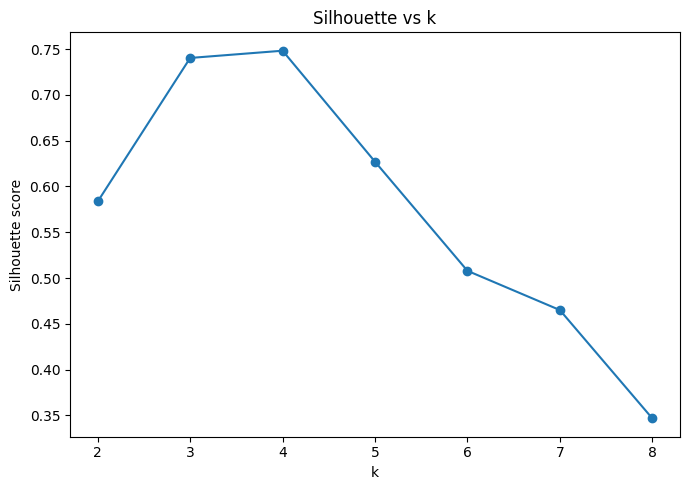

Choose k where inertia bends and silhouette is relatively high.


In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Simple data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

k_values = range(2, 9)
inertias = []
sil_scores = []

for k in k_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))

# Elbow plot (Inertia)
plt.figure(figsize=(7, 5))
plt.plot(list(k_values), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow method")
plt.tight_layout()
plt.show()

# Silhouette plot
plt.figure(figsize=(7, 5))
plt.plot(list(k_values), sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")
plt.tight_layout()
plt.show()

print("Choose k where inertia bends and silhouette is relatively high.")
